## PHYS 6260: Homework 2

In [168]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd

## Problem 1: The semi-empirical mass formula

In nuclear physics, the semi-empirical mass formula calculates the approximate nuclear binding energy B of an atomic nucleus with atomic number Z and mass number A. The formula reads as:

\begin{equation*}
B = a_1A - a_2A^{2/3} - a_3\frac{Z^2}{A^{1/3}}\ - a_4\frac{(A-2Z)^2}{A}\ + \frac{a_5}{A^{1/2}}\
\end{equation*}


where (in units of millions of electron volts, MeV), the constants $a_1$ = 15.67, $a_2$ = 17.23, $a_3$ = 0.75, $a_4$ = 93.2, and

\begin{equation*}
a_5 =\begin{cases}
0 & \quad \text{if }  \text{A is odd,}\\
12.0 & \quad \text{if }  \text{A and Z are both even,}\\
-12.0 & \quad \text{if }  \text{A is even and Z is odd.}
 \end{cases}
\end{equation*}

In [169]:
#constant
a1 = 15.67
a2 = 17.23
a3 = 0.75
a4 = 93.2

In [170]:
#function accepts A and Z as variables 
#then check if A, Z are odd or even to choose an appropriate constant a5
#then using the given function to calculate the approximate nuclear binding energy B
#and binding energy per nucleon 
#finally, return B

def binding(A,Z):
    #check if A, Z are odd or even to choose to a constant a5
    if (A&1) == 1:
        a5 = 0
    else:
        if (Z&1) == 1:
            a5 = -12.0
        else: 
            a5 = 12.0
            
    #calculate B and B_nucleon
    B = a1*A - a2*A**(2/3) - a3*Z**2/A**(1/3) - a4*(A-2*Z)**2/A + a5/A**(1/2)
    B_nucleon = B/A
    
    return B_nucleon

### Part (a)

In [172]:
#ask user to input Z
print("Consider an atomic nucleus:")
prompt = input("What is the value of atomic number Z? ")
Z1 = int(prompt)

#initialize variables maxB and stableA
maxB = 0
stableA = 0

#for Z, we run through all possible values of A = Z1 to 3xZ1
#then calculate binding energy per nucleon
#then compare to the current energy stored in maxB, if larger then stored energy in maxB and A in stableA
for i in range(Z1,3*Z1+1):
    A = i
    energy = binding(A,Z1)
    if maxB < energy:
        maxB = energy
        stableA = A

#print out the value of stable A
print("The most stable nucleus has A = %i with the binding energy per nucleon is %.2f" %(stableA, maxB))

Consider an atomic nucleus:
What is the value of atomic number Z? 28
The most stable nucleus has A = 58 with the binding energy per nucleon is 8.52


### Part (b)

In [173]:
# initialize value
B_max = 0
B_stable = []
Z_large = 0

# for Z from 1 to 100, prints out the most stable value of A using function as part b
# and prints out Z in which the maximum binding energy per nucleon occur
for z in range(1,101):
    B = 0
    A = 0
    for i in range(z,3*z+1):
        A1 = i
        energy1 = binding(A1,z)
        if B < energy1:
            B = energy1
            A = A1 
    B_stable.append(B)
    if B_max < B:
        B_max = B
        Z_large = z
    print("For Z = %i, the most stable nucleus has A = %i with the binding energy per nucleon is %.3f" %(z,A,B))
print("\nThe maximum binding energy per nucleon occurs at Z = %i" % Z_large)

For Z = 1, the most stable nucleus has A = 0 with the binding energy per nucleon is 0.000
For Z = 2, the most stable nucleus has A = 4 with the binding energy per nucleon is 5.843
For Z = 3, the most stable nucleus has A = 6 with the binding energy per nucleon is 4.752
For Z = 4, the most stable nucleus has A = 8 with the binding energy per nucleon is 6.835
For Z = 5, the most stable nucleus has A = 10 with the binding energy per nucleon is 6.423
For Z = 6, the most stable nucleus has A = 12 with the binding energy per nucleon is 7.450
For Z = 7, the most stable nucleus has A = 15 with the binding energy per nucleon is 7.276
For Z = 8, the most stable nucleus has A = 16 with the binding energy per nucleon is 7.829
For Z = 9, the most stable nucleus has A = 19 with the binding energy per nucleon is 7.757
For Z = 10, the most stable nucleus has A = 20 with the binding energy per nucleon is 8.075
For Z = 11, the most stable nucleus has A = 23 with the binding energy per nucleon is 8.048
F

### Part (c)

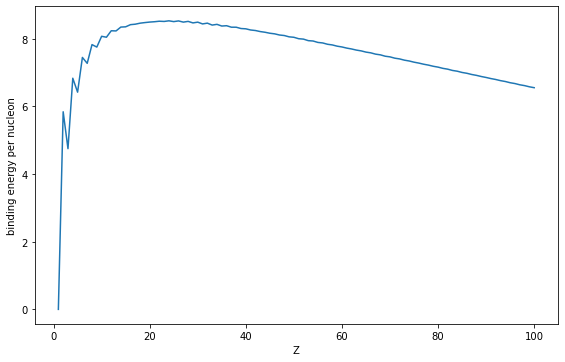

In [174]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(8,5)                      # (width,height)
fig.tight_layout()                            # Make better use of space on plot

ax.set_xlabel('Z')
ax.set_ylabel('binding energy per nucleon')
('The binding energy per nucleon for the most stable nucleus as a function of Z, for Z from 1 to 100')

plt.plot(range(1,101), B_stable);

## Problem 2: Plotting experimental data

The file called sunspots.txt contains the observed monthly number of sunspots since January 1979. The file has two columns of numbers, the first being the month and the second being the sunspot number.

### Part (a)

In [175]:
# This program reads in the data from file
sunspots = pd.read_csv('./sunspots.txt', header=None,delimiter = "\t").values
print(sunspots)

[[0.000e+00 5.800e+01]
 [1.000e+00 6.260e+01]
 [2.000e+00 7.000e+01]
 ...
 [3.140e+03 2.520e+01]
 [3.141e+03 2.350e+01]
 [3.142e+03 2.160e+01]]


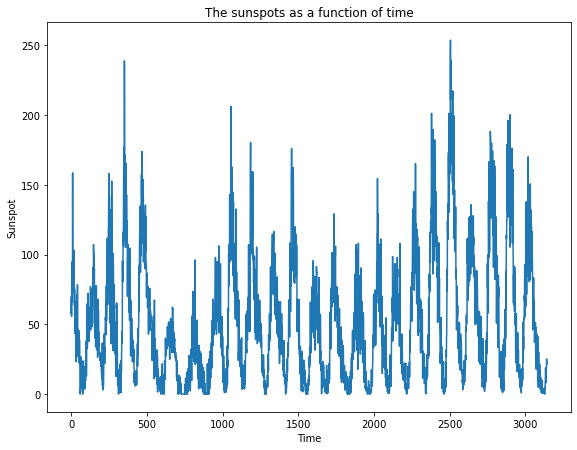

In [176]:
#  makes a graph of the sunspots as a function of time
time = []
sunspot = []

for i in range(int(sunspots.size/2)):
    time.append(sunspots[i,0])
    sunspot.append(sunspots[i,1])

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("Time")
ax.set_ylabel("Sunspot")
ax.set_title("The sunspots as a function of time")

plt.plot(time, sunspot);

### Part (b)

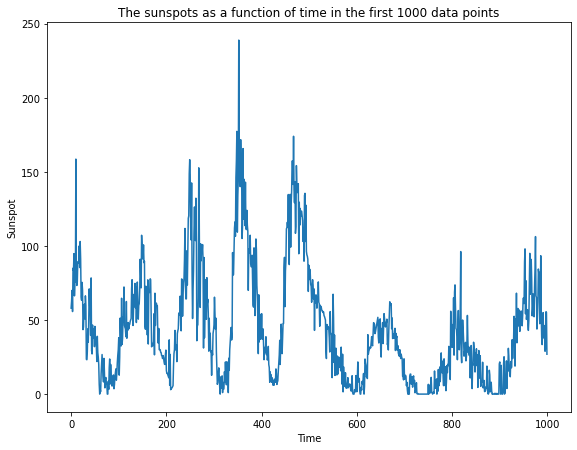

In [177]:
# This graph only display the first 1000 data points
time1 = []
sunspot1 = []

for i in range(1000):
    time1.append(sunspots[i,0])
    sunspot1.append(sunspots[i,1])

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("Time")
ax.set_ylabel("Sunspot")
ax.set_title("The sunspots as a function of time in the first 1000 data points")

plt.plot(time1, sunspot1);

### Part (c)

The running average of the data is defined by
$$Y_k = \frac{1}{2r+1}\sum_{m=-r}^{r} y_{k+m}$$

with r = 5 in this case and $y_k$ values are the sunspot numbers.

In [178]:
# Calculate the running average over the first 1000 data points
r = 5
ave_sunspot=[]
for k in range(1000):
    y = 0
    Big_y = 0
    for m in range(-r,r+1):
        if k+m>=0 and k+m <1000:
            y += sunspot1[k+m]
    Big_y = 1/(2*r+1)*y
    ave_sunspot.append(Big_y)

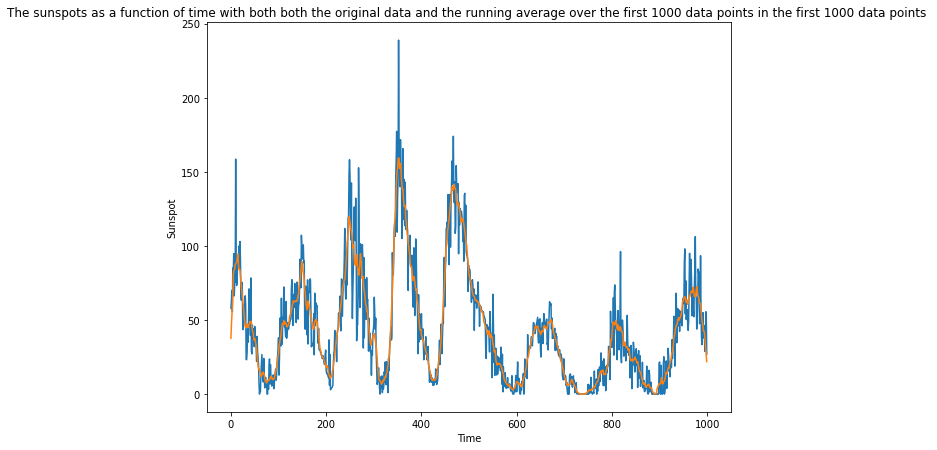

In [179]:
# The graph display both the original data and the running average over the first 1000 data points
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("Time")
ax.set_ylabel("Sunspot")
ax.set_title("The sunspots as a function of time with both both the original data and the running average over the first 1000 data points in the first 1000 data points ")

plt.plot(time1, sunspot1);
plt.plot(ave_sunspot);

## Problem 3: Curve plotting

### Part (a)

The deltoid curve is defined parametrically by the equations:

$$x = 2\cos\theta\ + \cos2\theta,  y = 2\sin\theta - \sin2\theta$$
where $0\le\theta\le2\pi$

This program takes a set of values of $\theta$ between 0 and $2\pi$ and calulate x and y in the equations above. Then, the graph shows y as a function of x.

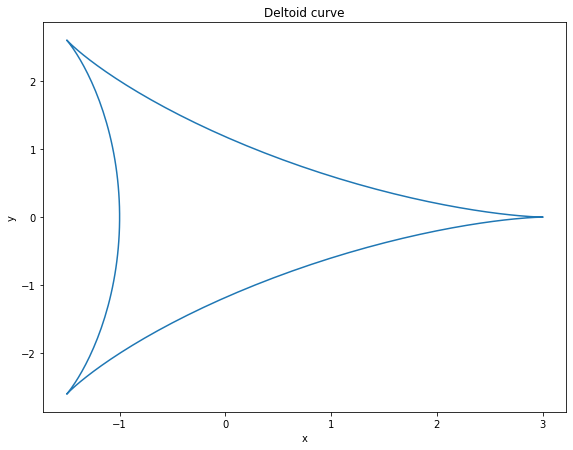

In [180]:
theta = np.linspace(0,2*np.pi,250)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Deltoid curve")

plt.plot(x,y);

### Part (b)

Plotting the Galilean spiral $r = \theta^2$ for $0\le\theta\le10\pi$ in Cartesian coordinate using the standard equation: $x = r\cos\theta, y = r\sin\theta$.

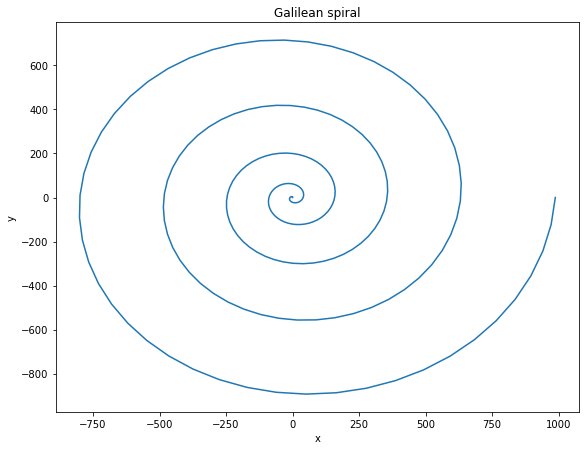

In [181]:
theta1 = np.linspace(0,10*np.pi,250)
r = theta1*theta1
x1 = r*np.cos(theta1)
y1 = r*np.sin(theta1)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Galilean spiral")

plt.plot(x1,y1);

### Part (c)

Plotting Fey's function $r = e^{\cos\theta} - 2\cos4\theta + \sin^5\frac{\theta}{12}$ in the range $0\le\theta\le24\pi$ in Cartesian coordinate using the standard equation: $x = r\cos\theta, y = r\sin\theta$.

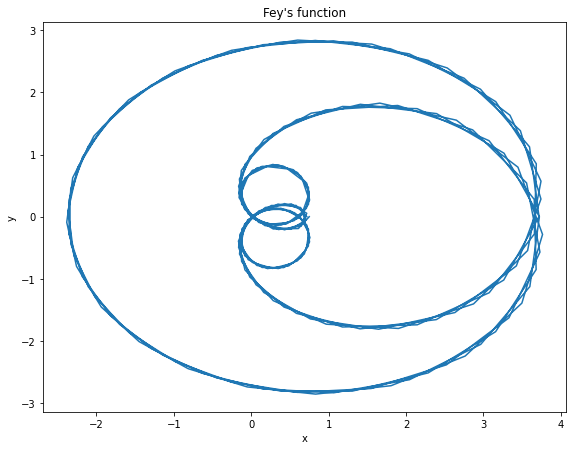

In [182]:
theta2 = np.linspace(0,24*np.pi,250)
r = np.exp(np.cos(theta2))-2*np.cos(4*theta)+(np.sin(theta/12))**5
x2 = r*np.cos(theta2)
y2 = r*np.sin(theta2)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Fey's function")

plt.plot(x2,y2);

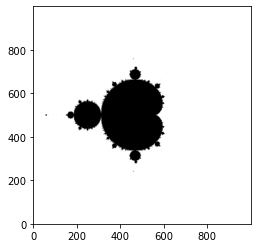

In [1]:




from pylab import imshow,show,gray
from numpy import zeros,linspace

n=1000

M = zeros([n,n],int)
xvalues = linspace(-2,2,n)
yvalues = linspace(-2,2,n)

for u,x in enumerate(xvalues):
    for v,y in enumerate(yvalues):
        z = 0 + 0j
        c = complex(x,y)
        for i in range(100):
            z = z*z + c
            if abs(z) > 2.0:
                M[v,u] = 1
                break

imshow(M,origin="lower")
gray()
show()

